<a href="https://colab.research.google.com/github/Rakhan00/Compuer-Vision-Projects/blob/main/Classification_Hand_Written_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Model to Identify Hand Written Digits**

**The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents**

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
from sklearn.datasets import load_digits
df = load_digits()

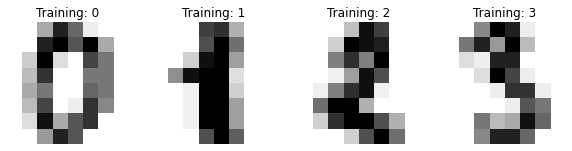

In [ ]:
# visualizing the data 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# **Image Preprocessing**

**Flatten Image**

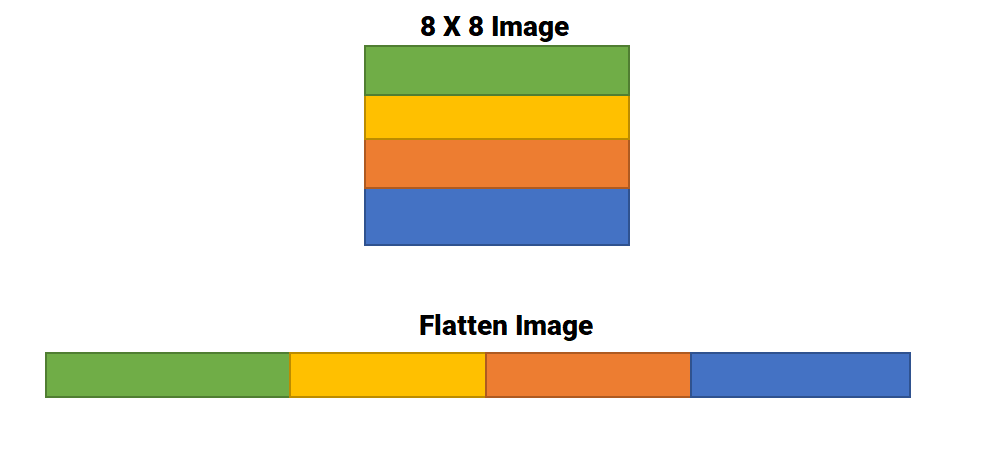

In [ ]:
# shape of dataset
df.images.shape

(1797, 8, 8)

In [ ]:
# view pixels of first image with index 0
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
# shape of first image with index 0
df.images[0].shape

(8, 8)

In [ ]:
# number of total images
len(df.images)

1797

In [ ]:
# flatten images
n_samples = len(df.images)
flatten_data = df.images.reshape((n_samples, -1)) # -1 means you decide that means model will decide

In [ ]:
# flatten image view
flatten_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# flatten image shape
flatten_data[0].shape

(64,)

In [ ]:
# flatten_data shape
flatten_data.shape

(1797, 64)

# **Scaling Image Data**

In [ ]:
# minimum value of image pixel
flatten_data.min()

0.0

In [ ]:
# maximum value of image pixel
flatten_data.max()

16.0

In [ ]:
# scale each pixel
flatten_data = flatten_data/16

In [ ]:
# minimum value of scaled image pixel
flatten_data.min()

0.0

In [ ]:
# maximum value of scaled image pixel
flatten_data.max()

1.0

In [ ]:
flatten_data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [ ]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    flatten_data, df.target, test_size=.30, random_state=2529)

In [ ]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predict with model
y_pred = model.predict(X_test)

In [ ]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
# model accuracy
accuracy_score(y_test,y_pred)

0.9685185185185186

In [ ]:
# model confusion matrix
confusion_matrix(y_test, y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  5,  0,  1,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  3,  0,  1,  0,  1,  1, 47]])

In [ ]:
# model classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       0.93      0.96      0.94        52
           4       0.96      0.98      0.97        54
           5       0.97      1.00      0.98        58
           6       1.00      0.96      0.98        52
           7       0.96      1.00      0.98        50
           8       0.96      0.89      0.92        53
           9       1.00      0.89      0.94        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

